In [3]:
from sklearn.datasets import fetch_openml
import pandas as pd
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
df_MNIST = pd.DataFrame(X)

In [4]:
df_MNIST.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'1'

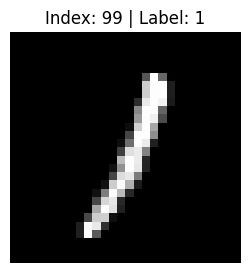

In [38]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

def show_mnist_image(index, X, y):
    # 1. Extraction et Redimensionnement
    # On s'assure de prendre l'image à l'index donné
    img = X[index].reshape(28, 28)
    
    # 2. Création de la figure
    fig, ax = plt.subplots(figsize=(3, 3))
    
    # Affichage
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Index: {index} | Label: {y[index]}")
    ax.axis('off')
    
    return fig

show_mnist_image(99, X, y)

y[99]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(70000, 2)

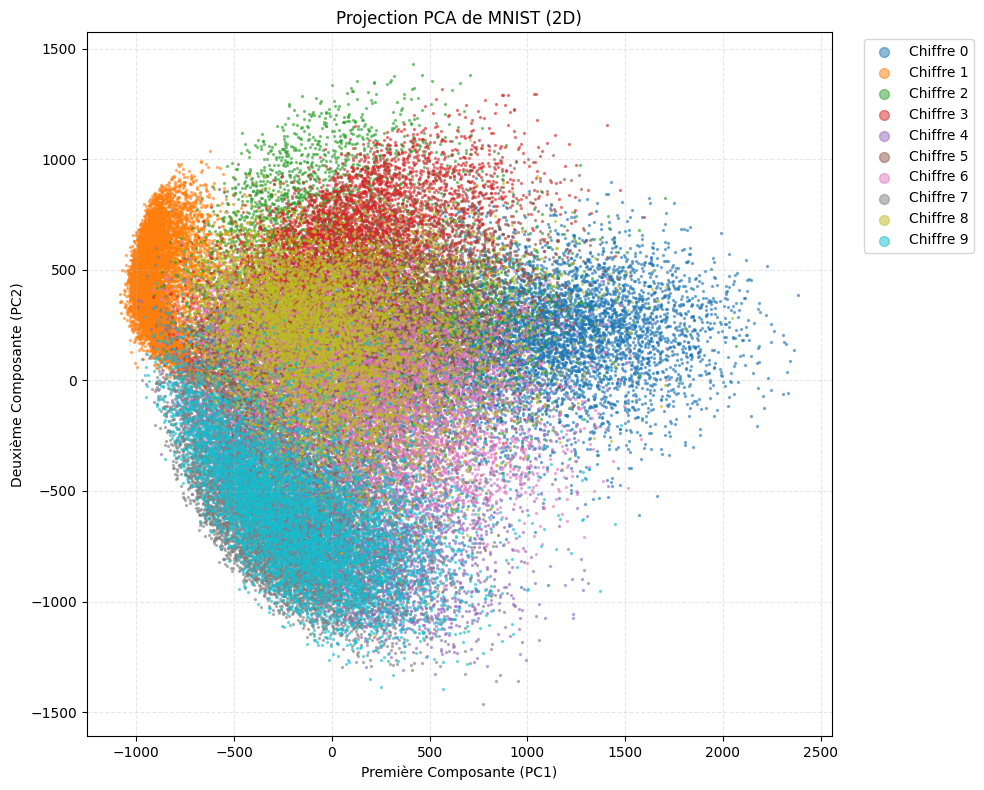

In [42]:
plt.figure(figsize=(10,8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))
y_numeric = np.array(y).astype(int)
for i in range(10):
    mask = y_numeric==i
    plt.scatter(
        X_pca[mask, 0], 
        X_pca[mask, 1], 
        label=f"Chiffre {i}", 
        color=colors[i], # On impose la couleur i
        alpha=0.5, 
        s=2
    )
plt.legend(markerscale=5, loc='upper right', bbox_to_anchor=(1.2, 1)) 
plt.title("Projection PCA de MNIST (2D)")
plt.xlabel("Première Composante (PC1)")
plt.ylabel("Deuxième Composante (PC2)")
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3. Préparation du DataFrame pour Plotly
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['label'] = y
df_pca = df_pca.sort_values(by='label') # Pour avoir une légende triée

# 4. Création du scatter plot 3D interactif
fig = px.scatter_3d(
    df_pca, 
    x='PC1', 
    y='PC2', 
    z='PC3',
    color='label',           # Couleur par chiffre
    title="MNIST - Projection PCA (3 composantes)",
    labels={'label': 'Chiffre'},
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid # Palette de couleurs distinctes
)

# 5. Ajustement de la taille des points pour plus de clarté
fig.update_traces(marker=dict(size=1))
fig.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow